In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Exercise: GPU performance for fashion mnist dataset
This notebook is derived from a tensorflow tutorial here: https://www.tensorflow.org/tutorials/keras/classification So please refer to it before starting work on this exercise

You need to write code wherever you see your code goes here comment. You are going to do image classification for fashion mnist dataset and then you will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. You will eventually fill out this table with your performance benchmark numbers

Hidden Layer	CPU	GPU
1	?	?
5	?	?

In [3]:
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0]

9

In [7]:
classification = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt", "Sneaker","Bag","Ankle boot"]

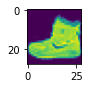

In [8]:
plot.figure(figsize=(10,1))
plot.imshow(x_train[0])

In [9]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [10]:
def get_model(no_layers=1):
        hidden_layers = {1: [ tf.keras.layers.Flatten(input_shape = (28,28)),
                           tf.keras.layers.Dense(784,activation = 'relu'),
                           tf.keras.layers.Dense(10, activation = 'sigmoid')],
                 5: [
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(784,activation = 'relu'),
        tf.keras.layers.Dense(350,activation = 'relu'),
        tf.keras.layers.Dense(100,activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'sigmoid')]    
            }
        model = tf.keras.Sequential(hidden_layers[no_layers])
        model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
        return model
        
   

In [11]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

5 Epochs performance comparison for 1 hidden layer

In [13]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(1)
    cpu_model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5780 - accuracy: 0.7963
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3621 - accuracy: 0.8668
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3216 - accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8897
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.8969
32.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(1)
    gpu_model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.7929
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3686 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3227 - accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2940 - accuracy: 0.8907
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2747 - accuracy: 0.8976
15.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


With 5 Hidden Layer And 5 Epochs

In [15]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model_5 = get_model(5)
    cpu_model_5.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5913 - accuracy: 0.7860
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3676 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3298 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3035 - accuracy: 0.8881
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2771 - accuracy: 0.8968
46.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model_5 = get_model(5)
    gpu_model_5.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7851
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8606
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3266 - accuracy: 0.8794
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.8954
17.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
